In [ ]:
# 참조 사이트
# https://www.kaggle.com/subhamjain/loan-prediction-based-on-customer-behavior

# **Importing Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt  
from collections import Counter

#Importing Models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

#Importing preprocessors

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from sklearn.model_selection import RandomizedSearchCV , GridSearchCV, RepeatedStratifiedKFold, StratifiedShuffleSplit,cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix , classification_report, make_scorer
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import plot_roc_curve ,roc_curve, roc_auc_score
from sklearn.metrics import fbeta_score
from yellowbrick.classifier import ClassificationReport

from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

# **Loading the Data**

In [2]:
df = pd.read_csv("Training Data.csv", index_col='Id')
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [4]:
# # Create New Feature,(Has the applicant ever worked anywhere other than his current job?) -> 나중에 조금더 보완할수 있도록 
# def chprof(df):
#     return 0 if df==0 else 1

df['Have_Changed_Profession'] = df['Experience'] - df['CURRENT_JOB_YRS']
df['Have_Changed_Profession'] = df['Have_Changed_Profession'].apply(lambda x:0 if(x==0) else 1)


In [5]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Have_Changed_Profession
Id,,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0,1
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0,1
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,0


 **Check for null elements(결측치 찾기)**

In [6]:
# Checking the null value
df.isnull().sum()

Income                     0
Age                        0
Experience                 0
Married/Single             0
House_Ownership            0
Car_Ownership              0
Profession                 0
CITY                       0
STATE                      0
CURRENT_JOB_YRS            0
CURRENT_HOUSE_YRS          0
Risk_Flag                  0
Have_Changed_Profession    0
dtype: int64

**Basic stats of data(기초통계 확인)**

In [68]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Have_Changed_Profession
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000,0.545365
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438,0.497939
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000,1.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000,1.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000,1.000000


# **Exploratory Data Analysis(데이터 시각화)**

0    221004
1     30996
Name: Risk_Flag, dtype: int64


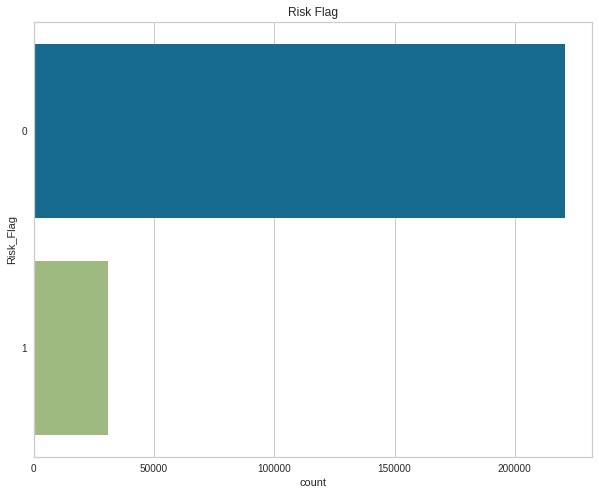

In [ ]:
# Check Risk Flags
plt.figure(figsize=(10,8))
sns.countplot(y=df['Risk_Flag'])
plt.title("Risk Flag")
print(df['Risk_Flag'].value_counts())

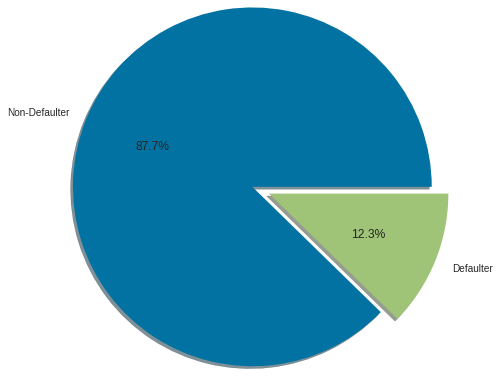

In [ ]:
r = df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%',  shadow=True)
;
plt.show()


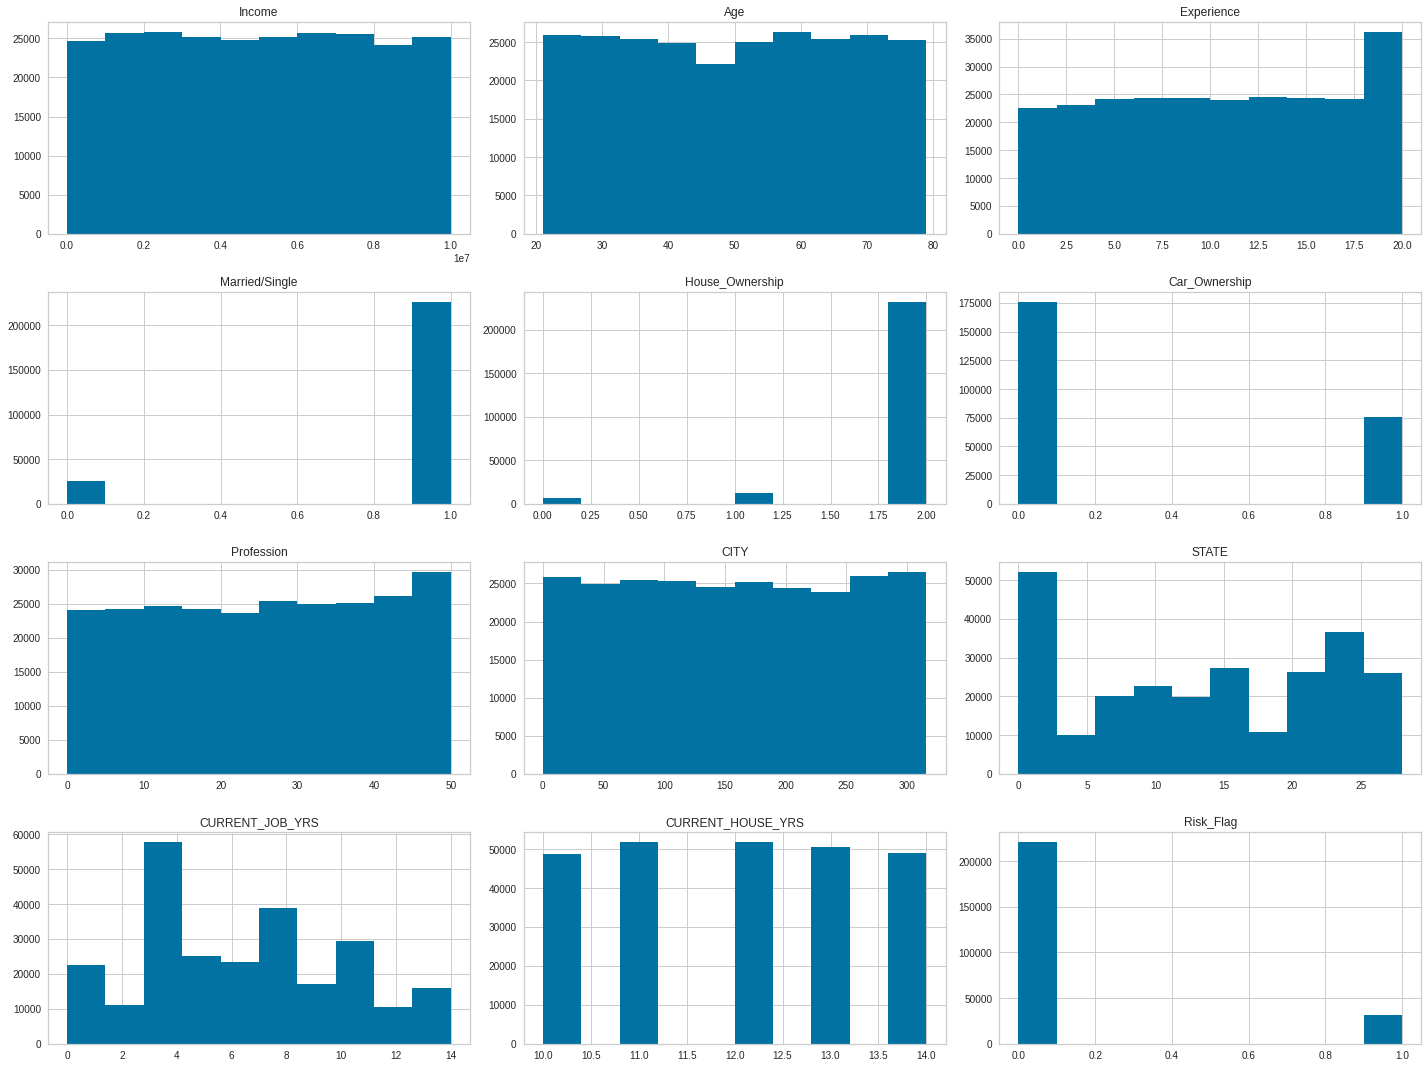

In [ ]:

df.hist(figsize = (20, 15))
plt.tight_layout()


All numerical features are uniformly distributed and there's a heavy imbalance in the target class.

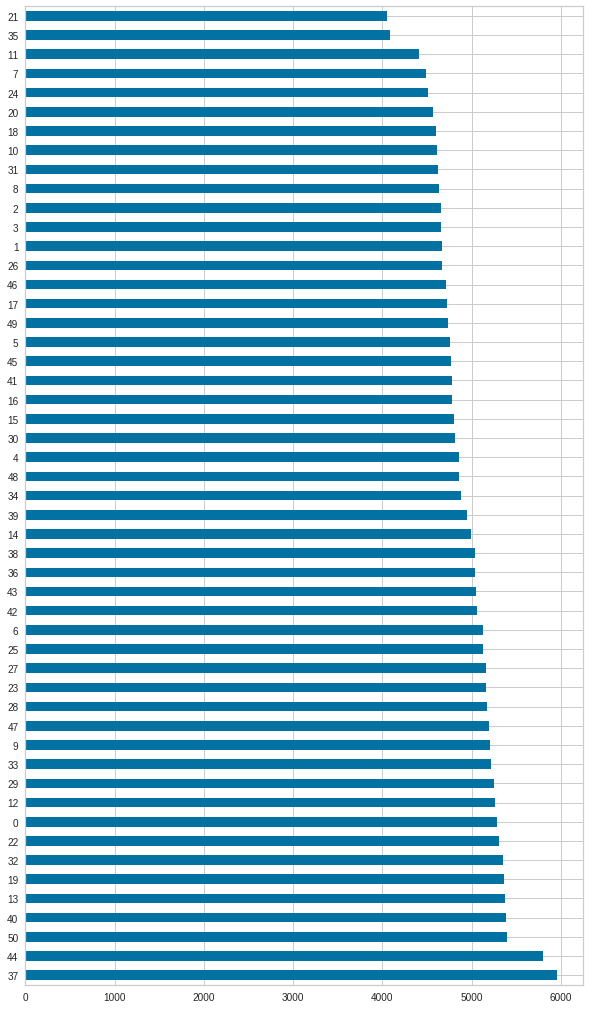

In [ ]:
plt.figure(figsize=(10,18))
df['Profession'].value_counts().plot(kind='barh')




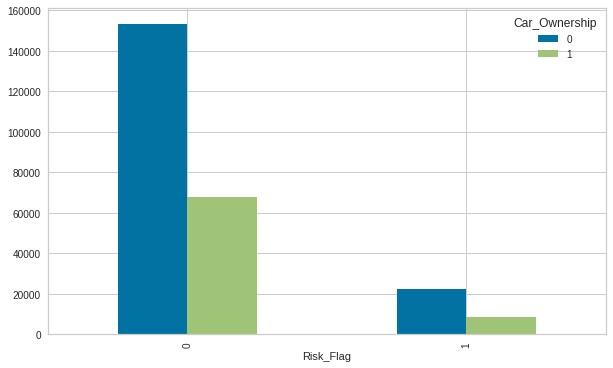

In [ ]:
pd.crosstab(df.Risk_Flag,df.Car_Ownership).plot(kind= "bar",figsize = (10,6))

In [ ]:
# pd.crosstab(df.Risk_Flag,df.CURRENT_JOB_YRS).plot(kind= "bar",figsize = (10,6) )

In [ ]:
# pd.crosstab(df.Risk_Flag,df.House_Ownership).plot(kind= "bar",figsize = (10,6) , color = ["salmon","lightblue","blue"] )

The number of defaulters is higher among those who have rented homes as can be expected in real life scenario.

In [ ]:
# fig, ax = plt.subplots( figsize = (12,8) )

# corr_matrix = df.corr()
# corr_heatmap = sns.heatmap( corr_matrix, cmap = "YlGnBu", annot=True, ax=ax, annot_kws={"size": 14})

# plt.show()

There's some collinearity between Current Job years and Experience, one of them can be removed from the data.

> **Seperating Numerical and Categorical columns**

In [ ]:
# cat_var = ['Married/Single','House_Ownership','Car_Ownership']
# num_var = list(x_train.select_dtypes(include =['int64','float64']).columns)

# y_train,y_test = np.array(y_train), np.array(y_test)
# print(num_var)
# print(cat_var)

In [ ]:
#데이터 쪼개기 30%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(176400, 11) (75600, 11) (176400,) (75600,)


In [ ]:
### smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
train_df, test_df = smote.fit_resample(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# **Preprocessing Data**

In [7]:
# Label Encoder
transform_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
for feature in transform_features:
    df[feature] = LabelEncoder().fit_transform(df[feature])

In [8]:
x_data = df.drop("Risk_Flag", axis=1)#"CITY","STATE" 상황보고 정리하도록
y_data = df["Risk_Flag"]

In [9]:
print(x_data.shape,y_data.shape)

(252000, 12) (252000,)


In [10]:
#데이터 쪼개기 20%
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(201600, 12) (50400, 12) (201600,) (50400,)


In [11]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Have_Changed_Profession'],
      dtype='object')

# **Resampling Data for target class balancing(클래스 불균형해소)**

To Undersample majority class (i.e class 0) : **RandomUnderSampler**

To Oversample majority class (i.e class 0) : **SMOTE (Synthetic Minority Over-sampling technique)**

No. of samples after under-Sampling: (74565, 12)
No. of samples after under-Sampling: (74565,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


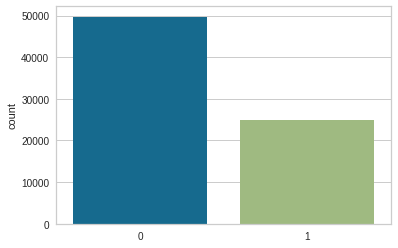

In [12]:
#Undersampling
under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=0)
x_train_under, y_train_under = under_sampler.fit_resample(x_train,y_train)

print("No. of samples after under-Sampling:", x_train_under.shape)
print("No. of samples after under-Sampling:", y_train_under.shape)
sns.countplot(x = y_train_under)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


No. of samples after Over-Sampling: (99420, 12)
No. of samples after Over-Sampling: (99420,)


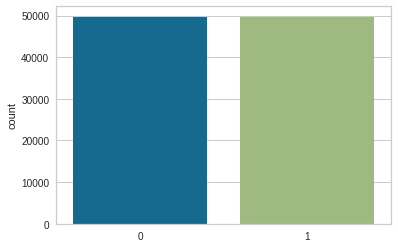

In [13]:
#Oversampling
over_sampler = SMOTE(random_state=0, n_jobs=-1, sampling_strategy=1)
x_train_SMOTE, y_train_SMOTE = over_sampler.fit_resample(x_train_under,y_train_under)
print("No. of samples after Over-Sampling:",x_train_SMOTE.shape)
print("No. of samples after Over-Sampling:",y_train_SMOTE.shape)
sns.countplot(x = y_train_SMOTE)

In [14]:
print(x_test.shape, y_test.shape, x_train_SMOTE.shape, y_train_SMOTE.shape)

(50400, 12) (50400,) (99420, 12) (99420,)


In [15]:
pd.DataFrame(x_train_SMOTE)      

,0,1,2,3,4,5,6,7,8,9,10,11
0,3643187,77,20,1,2,0,50,38,11,12,14,1
1,6467283,65,13,1,2,1,2,195,13,11,12,1
2,2307941,32,18,1,0,0,17,89,28,13,10,1
3,7681002,25,4,1,2,0,14,236,14,4,13,0
4,3921208,43,20,1,2,1,23,66,2,11,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99415,9211842,61,16,1,2,0,13,41,2,11,11,1
99416,7914034,23,2,1,2,0,8,106,11,2,10,0
99417,7564019,38,19,1,2,1,12,175,0,13,14,1
99418,9213176,50,13,1,2,0,3,101,25,3,14,1


In [16]:
x_train = pd.DataFrame(x_train_SMOTE)
x_train.columns = ['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Have_Changed_Profession']

In [17]:
pd.DataFrame(y_train_SMOTE)

,0
0,0
1,0
2,0
3,0
4,0
...,...
99415,1
99416,1
99417,1
99418,1


In [18]:
y_train = pd.DataFrame(y_train_SMOTE)
y_train.columns = ['Risk_Flag']

In [ ]:
# y_train.to_csv('y_train.csv') #엑셀로 저장

In [ ]:
# x_train.to_csv('x_train.csv') #엑셀로 저장

In [19]:
#굳이 loan으로 안바꿔도 되지 않나...?
loan_df = x_train.join(y_train)

In [20]:
loan_df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Have_Changed_Profession,Risk_Flag
0,3643187,77,20,1,2,0,50,38,11,12,14,1,0
1,6467283,65,13,1,2,1,2,195,13,11,12,1,0
2,2307941,32,18,1,0,0,17,89,28,13,10,1,0
3,7681002,25,4,1,2,0,14,236,14,4,13,0,0
4,3921208,43,20,1,2,1,23,66,2,11,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99415,9211842,61,16,1,2,0,13,41,2,11,11,1,1
99416,7914034,23,2,1,2,0,8,106,11,2,10,0,1
99417,7564019,38,19,1,2,1,12,175,0,13,14,1,1
99418,9213176,50,13,1,2,0,3,101,25,3,14,1,1


**파이프라인**

In [21]:
loan_target = loan_df[['Risk_Flag']].copy()


In [22]:
numeric_features = ['Income','Age','Experience',
                    'Profession','CITY','STATE',
                    'CURRENT_JOB_YRS','CURRENT_HOUSE_YRS',]
numeric_transformer = StandardScaler()

categorical_features = ['Married/Single','House_Ownership',
                        'Car_Ownership','Have_Changed_Profession']
categorical_transformer = OneHotEncoder(categories='auto')

preprocessor = ColumnTransformer(
    transformers=[ # List of (name, transformer, column(s))
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [23]:
preprocessor_pipe = Pipeline(steps=[('preprocessor', preprocessor)])
preprocessor_pipe.fit(loan_df)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Income', 'Age',
                                                   'Experience', 'Profession',
                                                   'CITY', 'STATE',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS']),
                                                 ('cat',
                                                  

In [24]:
loan_df_transformed = preprocessor_pipe.transform(loan_df)

In [25]:
loan_df_pipe = pd.DataFrame(loan_df_transformed)

In [26]:
loan_df_pipe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.461651,1.613062,1.707093,1.693415,-1.328851,-0.298167,1.584364,1.465249,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.512401,0.907820,0.535326,-1.575962,0.399236,-0.081921,1.310050,0.023514,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,-0.922188,-1.031598,1.372302,-0.554282,-0.767498,1.539922,1.858679,-1.418220,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.931023,-1.442989,-0.971231,-0.758618,0.850520,0.026202,-0.610149,0.744381,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-0.365760,-0.385125,1.707093,-0.145610,-1.020657,-1.271272,1.310050,0.023514,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99415,1.459022,0.672739,1.037512,-0.826730,-1.295830,-1.271272,1.310050,-0.697353,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
99416,1.011397,-1.560530,-1.306021,-1.167290,-0.580380,-0.298167,-1.158777,-1.418220,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
99417,0.890674,-0.678976,1.539697,-0.894842,0.179098,-1.487518,1.858679,1.465249,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
99418,1.459482,0.026266,0.535326,-1.507850,-0.635415,1.215553,-0.884463,1.465249,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


# > **Modeling**

# **PyCaret**

In [32]:
!pip install pycaret==2.1.2

     |████████████████████████████████| 252 kB 5.2 MB/s 
     |████████████████████████████████| 189 kB 43.0 MB/s 
     |████████████████████████████████| 80 kB 9.4 MB/s 
     |████████████████████████████████| 2.0 MB 43.3 MB/s 
     |████████████████████████████████| 14.6 MB 120 kB/s 
     |████████████████████████████████| 261 kB 49.9 MB/s 
     |████████████████████████████████| 271 kB 26.2 MB/s 
     |████████████████████████████████| 111 kB 48.3 MB/s 
     |████████████████████████████████| 76.4 MB 37 kB/s 
     |████████████████████████████████| 1.7 MB 32.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 23.1 MB 1.7 MB/s 
     |████████████████████████████████| 675 kB 43.7 MB/s 
     |████████████████████████████████| 3.1 MB 20.7 MB/s 
     |████████████████████████████████| 10.1 MB 35.2 MB/s 
     |████████████████

In [33]:
!pip install scikit-learn==0.23 # 반드시 Scikit-learn 버전을 맞춰줘야 합니다!

  Using cached scikit_learn-0.23.0-cp37-cp37m-manylinux1_x86_64.whl (7.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.0 which is incompatible.


In [8]:
1. tf.keras를 활용한 인공신경망 기반 분류

SyntaxError: ignored

In [ ]:
2. PyCaret을 활용한 low-code machine learning

In [34]:
# !pip install pycaret==2.1.2

from pycaret.classification import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# train_df = pd.read_csv("x_over.csv")

model = setup(data=loan_df, 
              target='Risk_Flag', 
              train_size=0.8, # default value
              ) # Random seed 

# 11	Transformed Train Set	(623, 18) : Training data (70% 할당됨)
# 12	Transformed Test Set	(268, 18) : Test data (30% 할당됨)

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:11:23
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


ImportError: ignored

In [ ]:
xgb = create_model('xgboost', shuffle=True) # creates a model and scores it using stratified cross validation (가능한 모델estimator 리스트는 docstring 참고)

In [ ]:
top_3_models = compare_models(sort='Accuracy', fold_shuffle=False, random_state=0, n_select = 3) # Select top n models 

# **최적모델 적용**

In [ ]:
파이캐럿............이놈.................................안녕.........

In [43]:
from sklearn.ensemble import ExtraTreesClassifier , GradientBoostingClassifier , RandomForestClassifier , VotingClassifier

model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False)


model.fit(x_train, y_train) # 기존데이터의70%인 train data 전부 적용하여 1번 검증

accuracy = model.score(x_test, y_test)
print("model score:", round(accuracy, 4))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


model score: 0.8652


In [44]:


model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None)
model.fit(x_train, y_train) 

accuracy = model.score(x_test, y_test)
print("model score:", round(accuracy, 4))                   

model score: 0.8561


In [ ]:
print(train_label.shape) # 모양을 영어로?
print(test_label.shape) # 모양을 영어로?

# **딥러닝**

In [27]:
loan_df_pipe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.461651,1.613062,1.707093,1.693415,-1.328851,-0.298167,1.584364,1.465249,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.512401,0.907820,0.535326,-1.575962,0.399236,-0.081921,1.310050,0.023514,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,-0.922188,-1.031598,1.372302,-0.554282,-0.767498,1.539922,1.858679,-1.418220,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.931023,-1.442989,-0.971231,-0.758618,0.850520,0.026202,-0.610149,0.744381,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,-0.365760,-0.385125,1.707093,-0.145610,-1.020657,-1.271272,1.310050,0.023514,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99415,1.459022,0.672739,1.037512,-0.826730,-1.295830,-1.271272,1.310050,-0.697353,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
99416,1.011397,-1.560530,-1.306021,-1.167290,-0.580380,-0.298167,-1.158777,-1.418220,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
99417,0.890674,-0.678976,1.539697,-0.894842,0.179098,-1.487518,1.858679,1.465249,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
99418,1.459482,0.026266,0.535326,-1.507850,-0.635415,1.215553,-0.884463,1.465249,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [28]:
# loan_target = loan_df[['Risk_Flag']].copy()
# loan_data = loan_df.copy()

# loan_target = loan_df[['15','16']].copy()
loan_data = loan_df_pipe.copy()

In [29]:
loan_target

,Risk_Flag
0,0
1,0
2,0
3,0
4,0
...,...
99415,1
99416,1
99417,1
99418,1


In [171]:
# del loan_data['Risk_Flag']#안해도되지 않나?
# del x_data['Risk_Flag']

KeyError: ignored

In [30]:
from sklearn import model_selection
train_data, test_data, train_label, test_label = model_selection.train_test_split(loan_data, loan_target,
                                                                                 test_size=0.2,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

#파이프라인 하는건 빠져있어 여기에 껴서 x데이터 대상으로 원핫인코딩이나 스탠다드 그거 진행해줘도 돼 

(79536, 17)
(19884, 17)
(79536, 1)
(19884, 1)


In [31]:
from sklearn import preprocessing

from tensorflow.keras import utils
train_label = utils.to_categorical(train_label) # 0 or 1 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0 or 1 -> one-hot vector

In [32]:
y_train #원핫 벡터형식으로 정답 변환

,Risk_Flag
0,0
1,0
2,0
3,0
4,0
...,...
99415,1
99416,1
99417,1
99418,1


In [ ]:
#4. Build & Train the model 

In [33]:
import tensorflow as tf

from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization #레이어 종류 임포트해서 자동완성하려고 

In [ ]:
# import os
# tf.logging.set_verbosity(tf.logging.ERROR)
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [34]:
model = models.Sequential() #도화지 열기 


#신경망 만들기
# model.add(layers.BatchNormalization()) # Use this line as if needed #오퍼피팅심하다싶으면 배치로 ㄱ ㄱ
model.add(layers.Dense(input_dim=17, units=256, activation=None, kernel_initializer=initializers.he_uniform()))# activation=None : 일부러 벗겨놓음
model.add(layers.Activation('relu')) #히든레이어에서 시그모이드 잘 안써 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu')) 

# model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
# model.add(layers.Activation('relu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(rate=0.5)) #죽일비율# Dropout-layer #배치놈이나 드롭아웃은 오버피팅 나면 쓰는거야 
#퍼셉트론이나 레이어의 수가 많으면 오버피팅 날수있어 영향을 주는게 여럿이야 

model.add(layers.Dense(units=2, activation='softmax')) # Apply softmax function on model's output

In [35]:
# "Compile" the model description (Configures the model for training)

model.compile(optimizer=optimizers.Adam(), #Adam #원한다면 러닝레이트값 변경할수있어
              loss=losses.categorical_crossentropy, #.categorical_crossentropy
              metrics=[metrics.categorical_accuracy]) 

In [36]:
# "Fit" the model on training data

history = model.fit(train_data, train_label, batch_size=100, epochs=20, validation_split=0.3)

# 557/557 [==============================] - 3s 6ms/step - loss: 0.3473 - categorical_accuracy: 0.8623 - val_loss: 0.4246 - val_categorical_accuracy: 0.8460 elu
# 557/557 [==============================] - 3s 5ms/step - loss: 0.2767 - categorical_accuracy: 0.8985 - val_loss: 0.4010 - val_categorical_accuracy: 0.8676 relu &신경망 2개

Epoch 1/20
557/557 [==============================] - 5s 7ms/step - loss: 0.6945 - categorical_accuracy: 0.5643 - val_loss: 0.6563 - val_categorical_accuracy: 0.6167
Epoch 2/20
557/557 [==============================] - 4s 7ms/step - loss: 0.6466 - categorical_accuracy: 0.6184 - val_loss: 0.6160 - val_categorical_accuracy: 0.6624
Epoch 3/20
557/557 [==============================] - 4s 7ms/step - loss: 0.6019 - categorical_accuracy: 0.6714 - val_loss: 0.5744 - val_categorical_accuracy: 0.6982
Epoch 4/20
557/557 [==============================] - 4s 7ms/step - loss: 0.5532 - categorical_accuracy: 0.7203 - val_loss: 0.5296 - val_categorical_accuracy: 0.7444
Epoch 5/20
557/557 [==============================] - 4s 7ms/step - loss: 0.5095 - categorical_accuracy: 0.7593 - val_loss: 0.5088 - val_categorical_accuracy: 0.7616
Epoch 6/20
557/557 [==============================] - 4s 7ms/step - loss: 0.4733 - categorical_accuracy: 0.7866 - val_loss: 0.4716 - val_categorical_accuracy: 0.8051
Epoc

In [179]:
# "Evaluate" the model on test data

result = model.evaluate(test_data, test_label) 
#모델 평가하는것(x,y)x데이터를 예측하고  y데이터를 만나게끔 함

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

#(11:56)
# 622/622 [==============================] - 2s 3ms/step - loss: 0.4090 - categorical_accuracy: 0.8671
# loss (cross-entropy) : 0.4090481698513031
# test accuracy : 0.8671293258666992

622/622 [==============================] - 2s 3ms/step - loss: 0.4090 - categorical_accuracy: 0.8671
loss (cross-entropy) : 0.4090481698513031
test accuracy : 0.8671293258666992


In [ ]:
#standard scaler -> min max 

In [45]:
mm_pipe_df = pd.read_csv("x_nomal(min-max).csv")

In [46]:
mm_pipe_df

,x0_0,x0_1,x1_0,x1_1,x1_2,x2_0,x2_1,7,8,9,10,11,12,13,14,15,16,Risk_Flag
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.448826,0.396552,0.50,0.46,0.113924,0.357143,0.500000,0.75,0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.864406,0.086207,0.55,0.14,0.243671,0.357143,0.642857,0.00,0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.138856,0.517241,0.55,0.02,0.772152,0.357143,0.714286,0.00,0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.539103,0.862069,0.50,1.00,0.408228,0.357143,0.357143,0.00,0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.589530,0.293103,0.75,0.92,0.275316,0.142857,0.928571,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98967,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.359774,0.482759,0.15,0.78,0.946203,0.285714,0.214286,0.00,1
98968,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.199097,0.068966,0.60,0.78,0.050633,0.357143,0.785714,1.00,1
98969,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.992215,0.741379,0.35,0.66,0.917722,0.357143,0.500000,0.25,1
98970,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.336710,0.396552,0.20,0.24,0.832278,0.321429,0.285714,0.75,1


In [ ]:
mm_loan_target = mm_pipe_df[['Risk_Flag']].copy()
mm_loan_data = mm_pipe_df.copy()
del loan_data['Risk_Flag']

Keras-tuner for Bayesian HPO



In [39]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 97 kB 5.5 MB/s 


In [40]:
import tensorflow as tf
import kerastuner as kt

print(tf.__version__)
print(kt.__version__)

2.6.0
1.0.3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [41]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from tensorflow import keras 
from tensorflow.keras import layers

import kerastuner as kt
import numpy as np
import IPython

In [ ]:
#케라스 튜너
#오토엠엘도 써봐라 

In [44]:
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(79536, 17)
(19884, 17)
(79536, 2)
(19884, 2)
